# <span style="color:DarkOliveGreen">LSTM Forecast of CDX.NA.IG

__Summary:__ <span style="color:Blue">Use LSTM model to fit and predict

In [2]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os
np.random.seed(0)

In [3]:
# User defined names
index = "CDX.NA.IG"
filename = "input_data.csv"
date_col = "Date"

In [4]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\World Quant\Capstone\GitHub_main\Notebooks


In [5]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [6]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
#df.index = pd.to_datetime(df.index)
df.head()

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
Date,,,,,,,,,,,,,,
2018-01-01,0.574,2673.61,11.04,1.39,1.53,1.76,1.89,1.98,2.20,2.33,2.40,2.58,2.74,49.020
2018-01-02,0.400,2695.81,9.77,1.44,1.61,1.83,1.92,2.01,2.25,2.38,2.46,2.64,2.81,48.455
2018-01-03,0.444,2713.06,9.15,1.41,1.59,1.81,1.94,2.02,2.25,2.37,2.44,2.62,2.78,47.095
2018-01-04,0.467,2723.99,9.22,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79,45.877
2018-01-05,0.475,2743.15,9.22,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81,45.518


In [33]:
df = df[:500]

## <span style="color:DarkOliveGreen">Functions

In [78]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [79]:
def create_dataset(n_X, look_back):
    dataX, dataY = [], []
    for i in range(len(n_X)-look_back):
        a = n_X[i:(i+look_back), ]
        dataX.append(a)
        dataY.append(n_X[i + look_back, ])
        
    return np.array(dataX), np.array(dataY)

In [91]:
x=list((df.index))
y=list((df['IG_MID'].values))

x_n = [days_between(i, x[-1]) for i in x]
x_n = [1+x.index(i) for i in x]

trainx, testx = x_n[0:int(0.8*(len(x)))], x_n[int(0.8*(len(x))):]
trainy, testy = y[0:int(0.8*(len(y)))], y[int(0.8*(len(y))):]
train = np.array(list(zip(trainx,trainy)))
test = np.array(list(zip(trainx,trainy)))


look_back = 15
trainx_lstm,trainy_lstm = create_dataset(train, look_back)
testx_lstm,testy_lstm = create_dataset(test, look_back)

trainx_lstm = np.reshape(trainx_lstm, (trainx_lstm.shape[0], look_back, 2))
testx_lstm = np.reshape(testx_lstm, (testx_lstm.shape[0], look_back, 2))

In [92]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (trainx_lstm.shape[1], 2)))
model.add(LSTM(128,input_shape = (trainx_lstm.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 15, 256)           265216    
                                                                 
 lstm_9 (LSTM)               (None, 128)               197120    
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 462,594
Trainable params: 462,594
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainx_lstm, trainy_lstm, epochs = 2000, batch_size = 64, verbose = 1, shuffle = False)
model.save_weights('LSTMBasic_IG.h5')

Epoch 1/2000
7/7 [==============================] - 4s 49ms/step - loss: 29466.6035
Epoch 2/2000
7/7 [==============================] - 0s 49ms/step - loss: 28417.2832
Epoch 3/2000
7/7 [==============================] - 0s 44ms/step - loss: 27663.7949
Epoch 4/2000
7/7 [==============================] - 0s 46ms/step - loss: 26999.5020
Epoch 5/2000
7/7 [==============================] - 0s 49ms/step - loss: 26509.2832
Epoch 6/2000
7/7 [==============================] - 0s 44ms/step - loss: 26174.5664
Epoch 7/2000
7/7 [==============================] - 0s 44ms/step - loss: 25907.1875
Epoch 8/2000
7/7 [==============================] - 0s 47ms/step - loss: 25652.3535
Epoch 9/2000
7/7 [==============================] - 0s 45ms/step - loss: 25396.9668
Epoch 10/2000
7/7 [==============================] - 0s 45ms/step - loss: 25163.7305
Epoch 11/2000
7/7 [==============================] - 0s 47ms/step - loss: 24938.9629
Epoch 12/2000
7/7 [==============================] - 0s 44ms/step - loss: 

7/7 [==============================] - 0s 46ms/step - loss: 13644.3027
Epoch 98/2000
7/7 [==============================] - 0s 47ms/step - loss: 13559.2998
Epoch 99/2000
7/7 [==============================] - 0s 48ms/step - loss: 13473.3154
Epoch 100/2000
7/7 [==============================] - 0s 46ms/step - loss: 13391.3154
Epoch 101/2000
7/7 [==============================] - 0s 49ms/step - loss: 13303.8301
Epoch 102/2000
7/7 [==============================] - 0s 48ms/step - loss: 13220.4482
Epoch 103/2000
7/7 [==============================] - 0s 45ms/step - loss: 13137.7861
Epoch 104/2000
7/7 [==============================] - 0s 46ms/step - loss: 13055.4561
Epoch 105/2000
7/7 [==============================] - 0s 47ms/step - loss: 12974.4922
Epoch 106/2000
7/7 [==============================] - 0s 44ms/step - loss: 12892.6807
Epoch 107/2000
7/7 [==============================] - 0s 49ms/step - loss: 12812.2354
Epoch 108/2000
7/7 [==============================] - 0s 49ms/step - lo

Epoch 193/2000
7/7 [==============================] - 0s 49ms/step - loss: 7508.3760
Epoch 194/2000
7/7 [==============================] - 0s 48ms/step - loss: 7461.9878
Epoch 195/2000
7/7 [==============================] - 0s 47ms/step - loss: 7415.8398
Epoch 196/2000
7/7 [==============================] - 0s 45ms/step - loss: 7374.0376
Epoch 197/2000
7/7 [==============================] - 0s 46ms/step - loss: 7324.6699
Epoch 198/2000
7/7 [==============================] - 0s 48ms/step - loss: 7284.7251
Epoch 199/2000
7/7 [==============================] - 0s 45ms/step - loss: 7232.9507
Epoch 200/2000
7/7 [==============================] - 0s 50ms/step - loss: 7189.2466
Epoch 201/2000
7/7 [==============================] - 0s 47ms/step - loss: 7142.9663
Epoch 202/2000
7/7 [==============================] - 0s 47ms/step - loss: 7096.9121
Epoch 203/2000
7/7 [==============================] - 0s 45ms/step - loss: 7053.4175
Epoch 204/2000
7/7 [==============================] - 0s 50ms/ste

7/7 [==============================] - 0s 47ms/step - loss: 4079.4478
Epoch 290/2000
7/7 [==============================] - 0s 44ms/step - loss: 4052.1252
Epoch 291/2000
7/7 [==============================] - 0s 44ms/step - loss: 4025.4087
Epoch 292/2000
7/7 [==============================] - 0s 46ms/step - loss: 3999.0554
Epoch 293/2000
7/7 [==============================] - 0s 44ms/step - loss: 3973.0789
Epoch 294/2000
7/7 [==============================] - 0s 46ms/step - loss: 3951.3782
Epoch 295/2000
7/7 [==============================] - 0s 48ms/step - loss: 3927.8433
Epoch 296/2000
7/7 [==============================] - 0s 44ms/step - loss: 3901.3730
Epoch 297/2000
7/7 [==============================] - 0s 45ms/step - loss: 3880.7678
Epoch 298/2000
7/7 [==============================] - 0s 48ms/step - loss: 3863.2029
Epoch 299/2000
7/7 [==============================] - 0s 44ms/step - loss: 3850.8423
Epoch 300/2000
7/7 [==============================] - 0s 44ms/step - loss: 3816.

7/7 [==============================] - 0s 44ms/step - loss: 2155.0938
Epoch 386/2000
7/7 [==============================] - 0s 44ms/step - loss: 2139.4575
Epoch 387/2000
7/7 [==============================] - 0s 48ms/step - loss: 2122.3105
Epoch 388/2000
7/7 [==============================] - 0s 44ms/step - loss: 2107.9949
Epoch 389/2000
7/7 [==============================] - 0s 44ms/step - loss: 2094.2302
Epoch 390/2000
7/7 [==============================] - 0s 48ms/step - loss: 2079.2131
Epoch 391/2000
7/7 [==============================] - 0s 44ms/step - loss: 2065.4727
Epoch 392/2000
7/7 [==============================] - 0s 43ms/step - loss: 2049.7776
Epoch 393/2000
7/7 [==============================] - 0s 47ms/step - loss: 2034.9165
Epoch 394/2000
7/7 [==============================] - 0s 43ms/step - loss: 2021.1368
Epoch 395/2000
7/7 [==============================] - 0s 44ms/step - loss: 2007.2607
Epoch 396/2000
7/7 [==============================] - 0s 46ms/step - loss: 1993.

7/7 [==============================] - 0s 47ms/step - loss: 1294.9087
Epoch 482/2000
7/7 [==============================] - 0s 44ms/step - loss: 1282.7579
Epoch 483/2000
7/7 [==============================] - 0s 46ms/step - loss: 1269.4863
Epoch 484/2000
7/7 [==============================] - 0s 49ms/step - loss: 1259.7264
Epoch 485/2000
7/7 [==============================] - 0s 44ms/step - loss: 1249.6328
Epoch 486/2000
7/7 [==============================] - 0s 45ms/step - loss: 1239.8427
Epoch 487/2000
7/7 [==============================] - 0s 47ms/step - loss: 1230.2113
Epoch 488/2000
7/7 [==============================] - 0s 43ms/step - loss: 1221.0420
Epoch 489/2000
7/7 [==============================] - 0s 45ms/step - loss: 1212.0391
Epoch 490/2000
7/7 [==============================] - 0s 47ms/step - loss: 1202.9478
Epoch 491/2000
7/7 [==============================] - 0s 45ms/step - loss: 1194.0857
Epoch 492/2000
7/7 [==============================] - 0s 44ms/step - loss: 1184.

7/7 [==============================] - 0s 49ms/step - loss: 751.1617
Epoch 579/2000
7/7 [==============================] - 0s 44ms/step - loss: 746.9656
Epoch 580/2000
7/7 [==============================] - 0s 43ms/step - loss: 740.1126
Epoch 581/2000
7/7 [==============================] - 0s 48ms/step - loss: 734.0919
Epoch 582/2000
7/7 [==============================] - 0s 44ms/step - loss: 725.1754
Epoch 583/2000
7/7 [==============================] - 0s 45ms/step - loss: 719.1343
Epoch 584/2000
7/7 [==============================] - 0s 50ms/step - loss: 712.4232
Epoch 585/2000
7/7 [==============================] - 0s 46ms/step - loss: 706.5499
Epoch 586/2000
7/7 [==============================] - 0s 45ms/step - loss: 700.7219
Epoch 587/2000
7/7 [==============================] - 0s 50ms/step - loss: 694.6387
Epoch 588/2000
7/7 [==============================] - 0s 43ms/step - loss: 688.4661
Epoch 589/2000
7/7 [==============================] - 0s 46ms/step - loss: 682.6838
Epoch 5

7/7 [==============================] - 0s 49ms/step - loss: 328.7691
Epoch 676/2000
7/7 [==============================] - 0s 46ms/step - loss: 374.3990
Epoch 677/2000
7/7 [==============================] - 0s 45ms/step - loss: 359.8054
Epoch 678/2000
7/7 [==============================] - 0s 47ms/step - loss: 412.1160
Epoch 679/2000
7/7 [==============================] - 0s 44ms/step - loss: 360.4612
Epoch 680/2000
7/7 [==============================] - 0s 44ms/step - loss: 343.9180
Epoch 681/2000
7/7 [==============================] - 0s 50ms/step - loss: 319.2495
Epoch 682/2000
7/7 [==============================] - 0s 44ms/step - loss: 303.2625
Epoch 683/2000
7/7 [==============================] - 0s 44ms/step - loss: 297.2917
Epoch 684/2000
7/7 [==============================] - 0s 47ms/step - loss: 291.2127
Epoch 685/2000
7/7 [==============================] - 0s 44ms/step - loss: 288.5427
Epoch 686/2000
7/7 [==============================] - 0s 45ms/step - loss: 284.8338
Epoch 6

7/7 [==============================] - 0s 51ms/step - loss: 126.1840
Epoch 773/2000
7/7 [==============================] - 0s 46ms/step - loss: 128.9303
Epoch 774/2000
7/7 [==============================] - 0s 45ms/step - loss: 140.5818
Epoch 775/2000
7/7 [==============================] - 0s 45ms/step - loss: 184.6701
Epoch 776/2000
7/7 [==============================] - 0s 50ms/step - loss: 136.4573
Epoch 777/2000
7/7 [==============================] - 0s 48ms/step - loss: 125.3112
Epoch 778/2000
7/7 [==============================] - 0s 44ms/step - loss: 117.8977
Epoch 779/2000
7/7 [==============================] - 0s 49ms/step - loss: 121.1540
Epoch 780/2000
7/7 [==============================] - 0s 46ms/step - loss: 128.3572
Epoch 781/2000
7/7 [==============================] - 0s 45ms/step - loss: 128.6895
Epoch 782/2000
7/7 [==============================] - 0s 47ms/step - loss: 136.9235
Epoch 783/2000
7/7 [==============================] - 0s 45ms/step - loss: 133.9896
Epoch 7

7/7 [==============================] - 0s 42ms/step - loss: 65.2304
Epoch 871/2000
7/7 [==============================] - 0s 44ms/step - loss: 95.1546
Epoch 872/2000
7/7 [==============================] - 0s 45ms/step - loss: 86.9857
Epoch 873/2000
7/7 [==============================] - 0s 44ms/step - loss: 104.5657
Epoch 874/2000
7/7 [==============================] - 0s 47ms/step - loss: 68.5638
Epoch 875/2000
7/7 [==============================] - 0s 46ms/step - loss: 53.9112
Epoch 876/2000
7/7 [==============================] - 0s 43ms/step - loss: 48.2766
Epoch 877/2000
7/7 [==============================] - 0s 44ms/step - loss: 46.9497
Epoch 878/2000
7/7 [==============================] - 0s 47ms/step - loss: 45.2366
Epoch 879/2000
7/7 [==============================] - 0s 43ms/step - loss: 44.3194
Epoch 880/2000
7/7 [==============================] - 0s 43ms/step - loss: 43.5859
Epoch 881/2000
7/7 [==============================] - 0s 46ms/step - loss: 43.1982
Epoch 882/2000
7/7

7/7 [==============================] - 0s 43ms/step - loss: 23.8630
Epoch 969/2000
7/7 [==============================] - 0s 44ms/step - loss: 23.7887
Epoch 970/2000
7/7 [==============================] - 0s 48ms/step - loss: 23.9338
Epoch 971/2000
7/7 [==============================] - 0s 43ms/step - loss: 23.8103
Epoch 972/2000
7/7 [==============================] - 0s 44ms/step - loss: 24.4893
Epoch 973/2000
7/7 [==============================] - 0s 48ms/step - loss: 24.9953
Epoch 974/2000
7/7 [==============================] - 0s 49ms/step - loss: 28.1464
Epoch 975/2000
7/7 [==============================] - 0s 44ms/step - loss: 31.2813
Epoch 976/2000
7/7 [==============================] - 0s 48ms/step - loss: 36.0688
Epoch 977/2000
7/7 [==============================] - 0s 44ms/step - loss: 36.3516
Epoch 978/2000
7/7 [==============================] - 0s 45ms/step - loss: 37.0677
Epoch 979/2000
7/7 [==============================] - 0s 52ms/step - loss: 31.0477
Epoch 980/2000
7/7 

7/7 [==============================] - 0s 51ms/step - loss: 16.6468
Epoch 1067/2000
7/7 [==============================] - 0s 53ms/step - loss: 18.3248
Epoch 1068/2000
7/7 [==============================] - 0s 48ms/step - loss: 24.0315
Epoch 1069/2000
7/7 [==============================] - 0s 48ms/step - loss: 26.4370
Epoch 1070/2000
7/7 [==============================] - 0s 51ms/step - loss: 26.2068
Epoch 1071/2000
7/7 [==============================] - 0s 48ms/step - loss: 18.2914
Epoch 1072/2000
7/7 [==============================] - 0s 47ms/step - loss: 16.6619
Epoch 1073/2000
7/7 [==============================] - 0s 51ms/step - loss: 16.3710
Epoch 1074/2000
7/7 [==============================] - 0s 47ms/step - loss: 15.7496
Epoch 1075/2000
7/7 [==============================] - 0s 50ms/step - loss: 15.3417
Epoch 1076/2000
7/7 [==============================] - 0s 51ms/step - loss: 15.1440
Epoch 1077/2000
7/7 [==============================] - 0s 47ms/step - loss: 15.5238
Epoch 10

7/7 [==============================] - 0s 47ms/step - loss: 11.0185
Epoch 1164/2000
7/7 [==============================] - 0s 49ms/step - loss: 11.0559
Epoch 1165/2000
7/7 [==============================] - 0s 47ms/step - loss: 11.5751
Epoch 1166/2000
7/7 [==============================] - 0s 47ms/step - loss: 13.4952
Epoch 1167/2000
7/7 [==============================] - 0s 50ms/step - loss: 18.8411
Epoch 1168/2000
7/7 [==============================] - 0s 52ms/step - loss: 26.9566
Epoch 1169/2000
7/7 [==============================] - 0s 50ms/step - loss: 38.2180
Epoch 1170/2000
7/7 [==============================] - 0s 52ms/step - loss: 42.7269
Epoch 1171/2000
7/7 [==============================] - 0s 46ms/step - loss: 60.2239
Epoch 1172/2000
7/7 [==============================] - 0s 50ms/step - loss: 80.2307
Epoch 1173/2000
7/7 [==============================] - 0s 49ms/step - loss: 119.2901
Epoch 1174/2000
7/7 [==============================] - 0s 59ms/step - loss: 68.6657
Epoch 1

Epoch 1261/2000
7/7 [==============================] - 0s 56ms/step - loss: 8.8827
Epoch 1262/2000
7/7 [==============================] - 0s 50ms/step - loss: 9.7327
Epoch 1263/2000
7/7 [==============================] - 0s 57ms/step - loss: 11.3532
Epoch 1264/2000
7/7 [==============================] - 0s 59ms/step - loss: 16.3828
Epoch 1265/2000
7/7 [==============================] - 0s 51ms/step - loss: 22.4643
Epoch 1266/2000
7/7 [==============================] - 0s 46ms/step - loss: 32.1900
Epoch 1267/2000
7/7 [==============================] - 0s 53ms/step - loss: 48.6409
Epoch 1268/2000
7/7 [==============================] - 0s 50ms/step - loss: 74.9338
Epoch 1269/2000
7/7 [==============================] - 0s 49ms/step - loss: 43.0724
Epoch 1270/2000
7/7 [==============================] - 0s 48ms/step - loss: 24.2036
Epoch 1271/2000
7/7 [==============================] - 0s 45ms/step - loss: 12.6226
Epoch 1272/2000
7/7 [==============================] - 0s 47ms/step - loss: 21

In [66]:
trainx.shape

(395, 5, 2)

## <span style="color:DarkOliveGreen">LSTM time Plots

In [81]:
model.load_weights('LSTMBasic_IG.h5')
predict = model.predict(testx_lstm)

13/13 [==============================] - 0s 7ms/step


In [82]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

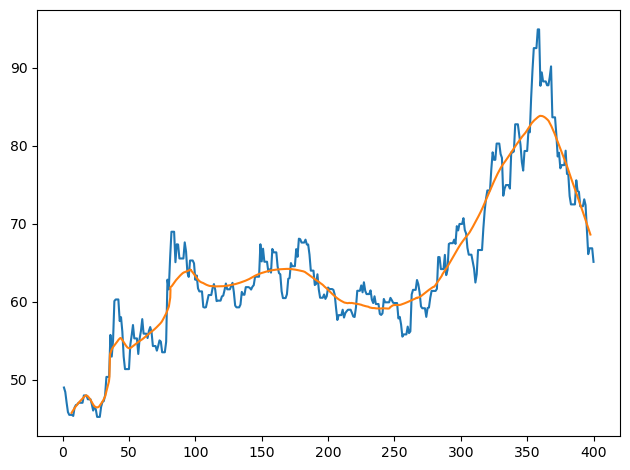

In [85]:
plt.plot(trainx, trainy,'-')
plt.plot(predict[:,0:1], predict[:,1:2],'-')
plt.tight_layout()
plt.savefig('Fitted_LSTM_LB_ '+ str(look_back) +'.png')
plt.show()
plt.close()

In [76]:
testx.shape

(395, 5, 2)

In [77]:
testx[0]

array([[ 1.   , 49.02 ],
       [ 2.   , 48.455],
       [ 3.   , 47.095],
       [ 4.   , 45.877],
       [ 5.   , 45.518]])

## <span style="color:DarkOliveGreen">Save the Data

In [44]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
#df.to_csv(index +"_data"+".csv", index=True)